In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
game_2016 = pd.read_csv('data\game_2016.csv', encoding='CP949')
players_2016 = pd.read_csv('data\players_2016.csv', encoding='CP949')
registered_players_2016 = pd.read_csv('data\\registered_players_2016.csv', encoding='CP949')
private_batter_2016 = pd.read_csv('data\private_batter_2016.csv', encoding='CP949')
private_pitcher_2016 = pd.read_csv('data\private_pitcher_2016.csv',encoding='CP949')
team_2016 = pd.read_csv('data\\team_2016.csv',encoding='CP949')
team_batter_2016 = pd.read_csv('data\\team_batter_2016.csv',encoding='CP949')
team_pitcher_2016 = pd.read_csv('data\\team_pitcher_2016.csv',encoding='CP949')

## 예측해야 하는 것

1. 타율 : 안타수(홈런)/타수
타수는 희생번트, 희생플라이, 4구, 사구, 방해에 의해 1루 나간 경우 제외

2. 방어율 : 자책점*9 / 투구이닝수 > 수비실책에 의한 실점은 제외한 자책점 
ex 9이닝동안 몇점을 내주느냐
7이닝동안 1실점을 한경우 >> 9/7 = 1.29

3. 승률

#### 홀드 : 초말 선수가 아닌 구원투수의 실적을 나타내는 용어 중 하나 
1. 3점이하의 리드시 등판하여 최소 1이닝(3아웃)을 막아주는 경우.
2. 점수차와 관계없이 리드시 최저 3이닝을 던져 리드를 지켜준 경우.
3. 백투백홈런(두 타자 연속홈런)을 맞으면 동점이 되는 상황에서 아웃 카운트 하나 이상을 올려준 경우.

#### 타수: 타자가 타석에 들어가서 타격을 완료한 횟수
희생 번프, 타격방해, 스트라이크 볼은 타수에 해당되지 않는다

#### 폭투: 투수가 공을 던졌을 때 포수가 공을 바로 잡지 못하는 경우.. 포수의 실수이거나 투수가 공을 너무 거칠게 던져서 발생

#### 보크: 반칙 투구 행위

## 경기

In [3]:
game_2016.head()

,G_ID,GDAY_DS,VISIT_KEY,HOME_KEY,HEADER_NO,GWEEK,STADIUM
0,20160401HHLG0,20160401,HH,LG,0,금,잠실
1,20160401HTNC0,20160401,HT,NC,0,금,마산
2,20160401KTSK0,20160401,KT,SK,0,금,문학
3,20160401LTWO0,20160401,LT,WO,0,금,고척
4,20160401OBSS0,20160401,OB,SS,0,금,대구


- 게임키 / 일자 / 원정팀코드 / 홈팀코드 / 더블헤더코드(0-일반경기,1-더블헤더1차전,2-더블헤더2차전)/ 요일 / 구장(경기치러가는구장)

## 선수

In [4]:
players_2016.head()

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2016,60100,백창수,LG,내,28,4000만원
1,2016,60105,배민관,LG,투,25,2700만원
2,2016,60146,이승현,LG,투,25,3700만원
3,2016,60164,유경국,LG,투,25,2700만원
4,2016,60181,김지용,LG,투,28,4000만원


- 시즌 / 선수코드 / 선수명 / 팀코드 / 포지션 / 나이 / 연봉

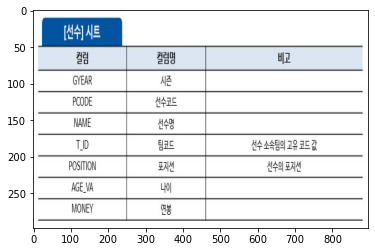

In [5]:
img1 = plt.imread('img\players.jpg')
plt.imshow(img1,aspect='auto')

In [6]:
players_2016['POSITION'].unique()

array(['내', '투', '포', '외'], dtype=object)

- 포지션 : 내야, 투수, 포수, 외야 

## 등록선수

In [7]:
registered_players_2016.head()

,GDAY_DS,T_ID,P_ID,ENTRY_YN
0,20160401,HH,60404,Y
1,20160401,HH,60667,Y
2,20160401,HH,60757,Y
3,20160401,HH,60764,N
4,20160401,HH,60768,N


- 일자(등록/말소 일자)/ 팀코드/ 선수코드/ 등록말소

## 개인 타자

In [31]:
private_batter_2016.head().transpose()

,0,1,2,3,4
G_ID,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0
GDAY_DS,20160401,20160401,20160401,20160401,20160401
T_ID,HH,LG,LG,LG,HH
VS_T_ID,LG,HH,HH,HH,LG
HEADER_NO,0,0,0,0,0
TB_SC,T,B,B,B,T
P_ID,60404,61102,61186,62164,62700
START_CK,0,1,1,0,1
BAT_ORDER_NO,3,8,7,9,9
PA,1,3,4,1,2


In [9]:
private_batter_2016.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
       'START_CK', 'BAT_ORDER_NO', 'PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2', 'H3',
       'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD', 'ERR',
       'LOB', 'P_HRA_RT', 'P_AB_CN', 'P_HIT_CN'],
      dtype='object')

- 게임키 / 일자 / 팀코드 / 상대팀코드 / 더블헤더코드 / 초말(T-초,B-말) / 선수코드 / 선발(선발출장여부-0,1) / 타순(해당경기 출전타순) / 타자 / 타수 / 타점 / 득점 / 안타 / 2루타/ 3루타 / 홈런 / 도루 / 도루실패 / 희타 / 희비 / 4구(볼넷) / 고4(고의4구) / 사구(몸에 맞는 볼) / 삼진 / 병살타 / 실책 / 잔루(이닝이 끝난 상황에 누상에 남아있는 주자 수) / 득점권타율 / 득점권타수 / 득점권안타

In [10]:
private_batter_2016.groupby(['G_ID','T_ID'])['P_ID'].count().mean()

12.975

- 한 경기당 평균적으로 12.9명의 선수가 출전한다 

In [23]:
private_batter_2016[(private_batter_2016['G_ID']=='20160401HHLG0')&(private_batter_2016['T_ID']=='LG')].transpose()

,1,2,3,5,6,8,9,10,15,16,19,21,22,23,24,25,28
G_ID,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0
GDAY_DS,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401,20160401
T_ID,LG,LG,LG,LG,LG,LG,LG,LG,LG,LG,LG,LG,LG,LG,LG,LG,LG
VS_T_ID,HH,HH,HH,HH,HH,HH,HH,HH,HH,HH,HH,HH,HH,HH,HH,HH,HH
HEADER_NO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TB_SC,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B
P_ID,61102,61186,62164,63077,63123,64153,65103,65115,71842,72133,74823,76100,78217,79150,79192,79198,99606
START_CK,1,1,0,0,1,0,1,0,0,1,1,1,0,1,0,0,1
BAT_ORDER_NO,8,7,9,2,9,2,5,7,8,3,1,4,9,2,9,9,6
PA,3,4,1,0,3,1,5,1,2,5,6,5,0,5,1,0,5


In [32]:
df1 =private_batter_2016[(private_batter_2016['G_ID']=='20160401HHLG0')&(private_batter_2016['T_ID']=='LG')]

- 잔루? 해당 선수가 3아웃으로 아웃되는 상황인 경우 누상에 남아있는 주자수를 의미하는가?

In [24]:
private_batter_2016['LOB'].unique()

array([1, 0, 2, 3, 4, 5], dtype=int64)

## 개인 투수

In [11]:
private_pitcher_2016.head(5).transpose()

,0,1,2,3,4
G_ID,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0
GDAY_DS,20160401,20160401,20160401,20160401,20160401
T_ID,LG,LG,LG,LG,HH
VS_T_ID,HH,HH,HH,HH,LG
HEADER_NO,0,0,0,0,0
TB_SC,B,B,B,B,T
P_ID,60146,61891,62146,62698,65764
START_CK,0,0,0,1,0
RELIEF_CK,1,1,1,0,1
CG_CK,0,0,0,0,0


In [12]:
private_pitcher_2016.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
       'START_CK', 'RELIEF_CK', 'CG_CK', 'QUIT_CK', 'WLS', 'HOLD', 'INN2',
       'BF', 'PA', 'AB', 'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB',
       'IB', 'HP', 'KK', 'GD', 'WP', 'BK', 'ERR', 'R', 'ER', 'P_WHIP_RT',
       'P2_WHIP_RT', 'CB_WHIP_RT'],
      dtype='object')

- 게임키 / 일자 / 팀코드 / 상대팀코드 / 더블헤더코드 / 초말 / 선수코드/ 선발(0,1) / 구원(0,1) / 완투(0,1) / 종료(마지막 투수여부-0,1) / 결과(W승 L패 S세) / 홀드 / 이닝*3 /투구수 / 타자(상대타자 숫자) / 타수(상대타자 타수) / 안타/ 2루타/ 3루타/ 홈런 / 도루/ 도루실패 / 희타 / 희비 / 4구 / 고4 / 사구(몸에 맞는볼) / 삼진 / 병살타 / 폭투 / 보크 / 실책 / 실점(총실점) / 자책점(투수의 책임이 되는 실점) / 득점권 WHIP / 2점이하 WHIP/ 345번타자(WHIP)

In [13]:
private_pitcher_2016[(private_pitcher_2016['G_ID']=='20160401HHLG0')&(private_pitcher_2016['T_ID']=='LG')].transpose()

,0,1,2,3,5,6
G_ID,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0,20160401HHLG0
GDAY_DS,20160401,20160401,20160401,20160401,20160401,20160401
T_ID,LG,LG,LG,LG,LG,LG
VS_T_ID,HH,HH,HH,HH,HH,HH
HEADER_NO,0,0,0,0,0,0
TB_SC,B,B,B,B,B,B
P_ID,60146,61891,62146,62698,70839,71118
START_CK,0,0,0,1,0,0
RELIEF_CK,1,1,1,0,1,1
CG_CK,0,0,0,0,0,0


- 경기 결과가 한 선수의 행에만 존재해서 같은 경기를 치룬 투수들에게 동일한 값을 할당해야 함
- INN2 이게 정확히 뭘 말하는지 모르겠음.. 3의 배수가 아닌 것이 있음 

In [22]:
private_pitcher_2016['SH'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
private_pitcher_2016.groupby(['G_ID','T_ID'])['P_ID'].count().mean()

4.4534722222222225

## 팀시트

In [16]:
team_2016

,T_ID,T_NM
0,HH,한화
1,HT,KIA
2,KT,KT
3,LG,LG
4,LT,롯데
5,NC,NC
6,OB,두산
7,SK,SK
8,SS,삼성
9,WO,넥센


- 팀코드/팀명

## 팀타자

In [17]:
team_batter_2016.head(5).transpose()

,0,1,2,3,4
G_ID,20160401HHLG0,20160401HHLG0,20160401HTNC0,20160401HTNC0,20160401KTSK0
GDAY_DS,20160401,20160401,20160401,20160401,20160401
T_ID,LG,HH,NC,HT,SK
VS_T_ID,HH,LG,HT,NC,KT
HEADER_NO,0,0,0,0,0
TB_SC,B,T,B,T,B
PA,47,52,36,38,36
AB,42,46,30,34,36
RBI,4,4,5,3,4
RUN,5,4,5,4,4


In [35]:
df1.sum()

G_ID            20160401HHLG020160401HHLG020160401HHLG02016040...
GDAY_DS                                                 342726817
T_ID                           LGLGLGLGLGLGLGLGLGLGLGLGLGLGLGLGLG
VS_T_ID                        HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
HEADER_NO                                                       0
TB_SC                                           BBBBBBBBBBBBBBBBB
P_ID                                                      1215284
START_CK                                                        9
BAT_ORDER_NO                                                  100
PA                                                             47
AB                                                             42
RBI                                                             4
RUN                                                             5
HIT                                                             9
H2                                                              2
H3        

- 팀 기록은 개인 데이터의 값을 단순히 더한 것..

In [30]:
team_batter_2016[(team_batter_2016['G_ID']=='20160401HHLG0')&(team_batter_2016['T_ID']=='LG')].transpose()

,0
G_ID,20160401HHLG0
GDAY_DS,20160401
T_ID,LG
VS_T_ID,HH
HEADER_NO,0
TB_SC,B
PA,47
AB,42
RBI,4
RUN,5


## 팀투수

In [18]:
team_pitcher_2016.head(5).transpose()

,0,1,2,3,4
G_ID,20160401HHLG0,20160401HHLG0,20160401HTNC0,20160401HTNC0,20160401KTSK0
GDAY_DS,20160401,20160401,20160401,20160401,20160401
T_ID,LG,HH,NC,HT,SK
VS_T_ID,HH,LG,HT,NC,KT
HEADER_NO,0,0,0,0,0
TB_SC,B,T,B,T,B
CG_CK,0,0,0,0,0
WLS,W,L,W,L,L
HOLD,0,0,0,0,0
INN2,36,34,27,24,27
